**Theorethical info:**
## Image Segmentation: Part 1
https://towardsdatascience.com/image-segmentation-part-1-9f3db1ac1c50


In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [71]:
def show(pic, ax = None):
    if ax:
        ax.imshow(pic, cmap = 'gray')
    else:
        plt.imshow(pic, cmap = 'gray')
        
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

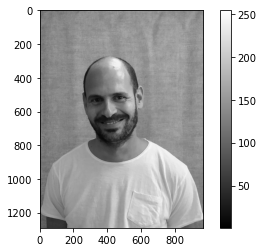

In [139]:
pic = plt.imread('uri.jpeg')
pic = rgb2gray(pic)
show(pic)
plt.colorbar()

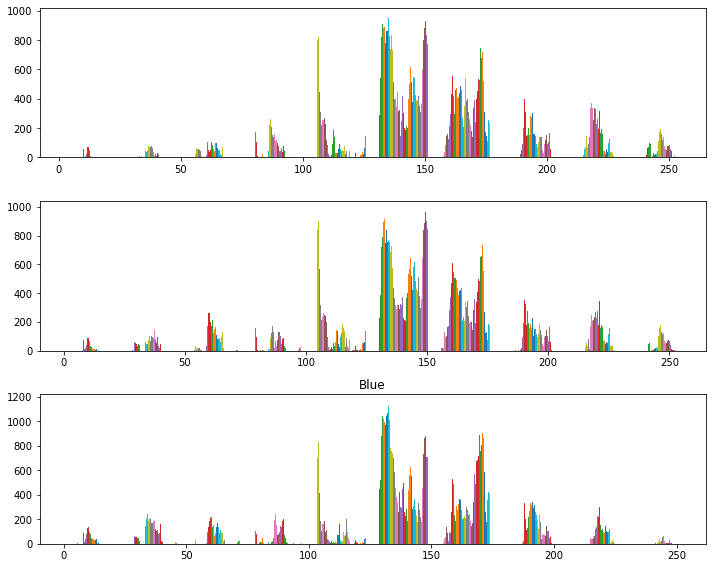

In [21]:
channels = ['Red','Green','Blue']
fig, axes = plt.subplots(figsize = (10,8), nrows = 3)
for i, c in enumerate(channels):
    axes[i].hist(pic[i])
    plt.title(c)
plt.tight_layout()

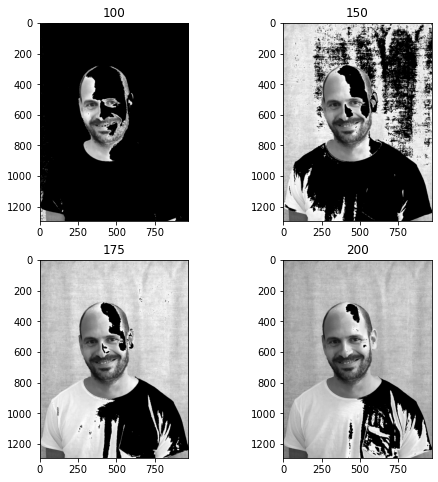

In [140]:
fig, axes = plt.subplots(figsize = (8,8), ncols = 2, nrows = 2)
for i,t in enumerate([100,150,175,200]):
    show(np.where(pic > t, 0, pic), ax = axes.flatten()[i])
    axes.flatten()[i].set_title(str(t))

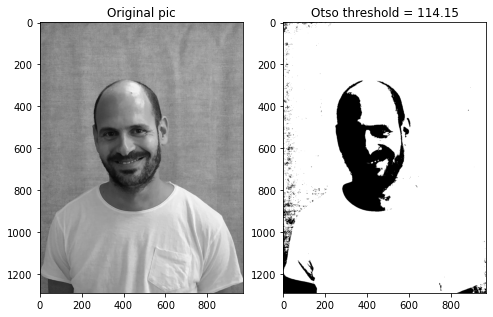

In [143]:
# Otsu Method (automatic thresholding)

from skimage.filters import threshold_otsu
thresh = threshold_otsu(pic)
pic_ot = pic > thresh

fig, axes = plt.subplots(1,2,figsize = (8,5))
show(pic, axes[0])
axes[0].set_title('Original pic')
show(pic_ot, axes[1])
axes[1].set_title(f'Otso threshold = {thresh:.2f}');

## HSV color segmentation

https://towardsdatascience.com/image-segmentation-part-1-6e0ddb5f7f8a

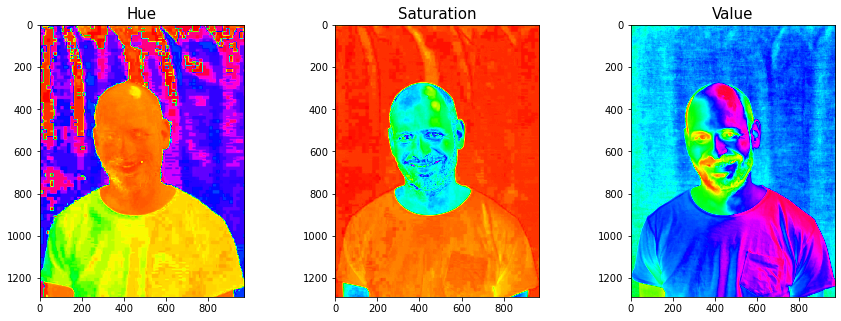

In [339]:
from skimage.color import rgb2hsv
pic = plt.imread('uri.jpeg') # RGB
 
#convert to hsv scale
pic_h= rgb2hsv(pic)
#graph per HSV Channel
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(pic_h[:,:,0], cmap='hsv')
ax[0].set_title('Hue',fontsize=15)
ax[1].imshow(pic_h[:,:,1], cmap='hsv')
ax[1].set_title('Saturation',fontsize=15)
ax[2].imshow(pic_h[:,:,2], cmap='hsv')
ax[2].set_title('Value',fontsize=15);


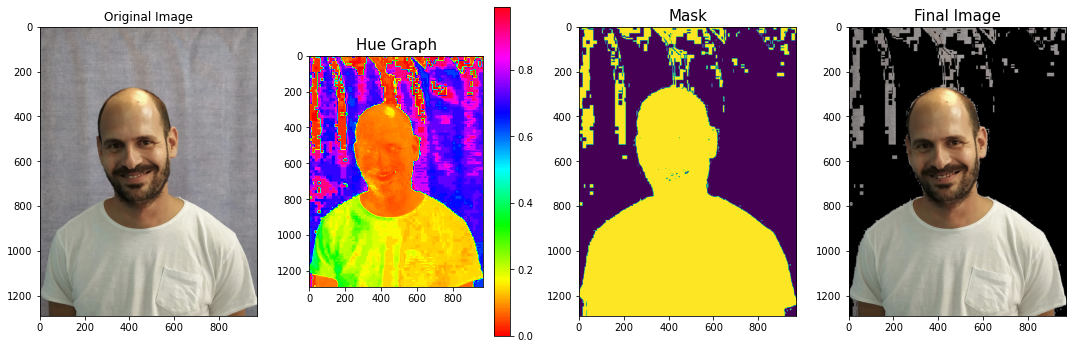

In [344]:
fig, ax = plt.subplots(1,4,figsize=(15,5))
ax[0].imshow(pic)
ax[0].set_title('Original Image')
im = ax[1].imshow(pic_h[:,:,0],cmap='hsv')
fig.colorbar(im,ax=ax[1])
ax[1].set_title('Hue Graph',fontsize=15)
#set the lower and upper mask based on hue colorbar value of the desired fruit
lower_mask = pic_h[:,:,0] > 0.03
upper_mask = pic_h[:,:,0] < 0.6
mask = upper_mask*lower_mask
# get the desired mask and show in original image
red = pic[:,:,0]*mask
green = pic[:,:,1]*mask
blue = pic[:,:,2]*mask
mask2 = np.dstack((red,green,blue))
ax[2].imshow(mask)
ax[3].imshow(mask2)
ax[2].set_title('Mask',fontsize=15)
ax[3].set_title('Final Image',fontsize=15)
plt.tight_layout()
plt.show()

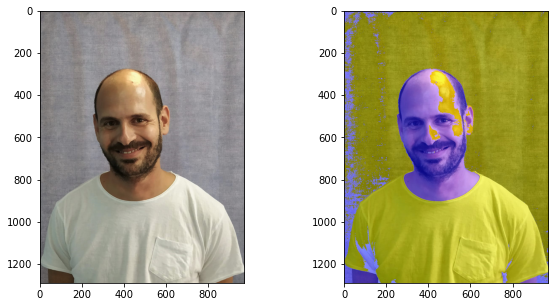

In [273]:
shift = 125
c = 2
x = np.arange(256).astype(int)
shift_dict = {i:j for i,j in zip (x, np.roll(x, shift).astype(int))}

pic_h = np.copy(pic)
df = pd.DataFrame(pic_h[:,:,c]).astype(int).replace(shift_dict)
pic_h[:,:,c] = df.values

fig, axes = plt.subplots(figsize = (10,5), ncols = 2)
for i, p in enumerate([pic, pic_h]):
    show(p, ax = axes[i])

# RG Chromaticity
https://towardsdatascience.com/image-segmentation-part-2-ea377218fb3f

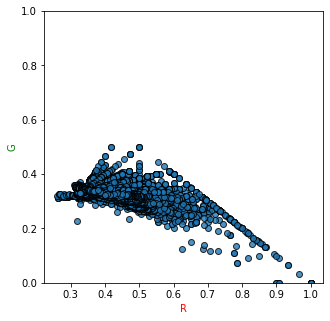

In [356]:
R = pic[..., 0] / pic.sum(axis = 2)
G = pic[..., 1] / pic.sum(axis = 2)
plt.figure(figsize = (5,5))
plt.scatter(R.flatten(),G.flatten(), edgecolor = 'black', alpha = 0.8)
plt.ylim(0,1)
plt.xlabel('R', color = 'red') ; plt.ylabel('G', color = 'green');

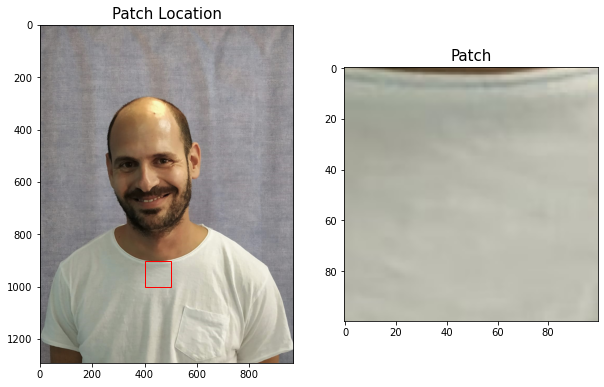

In [379]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic)
ax[0].add_patch(Rectangle((400, 900), 100, 100, edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)
#Showing Patch
patch = pic[900:1000, 400:500]
ax[1].imshow(patch)
ax[1].set_title('Patch',fontsize=15)
plt.show()

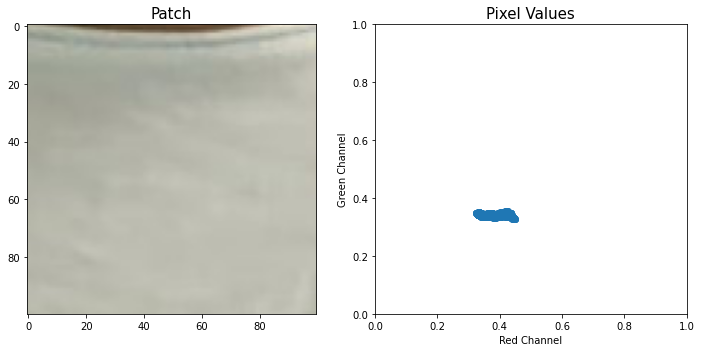

In [380]:
patch_R = patch[:,:,0]*1.0/patch.sum(axis=2)
patch_G = patch[:,:,1]*1.0/patch.sum(axis=2)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(patch)
ax[1].scatter(patch_R.flatten(),patch_G.flatten())
ax[0].set_title('Patch',fontsize=15)
ax[1].set_title('Pixel Values',fontsize=15)
ax[1].set_xlabel('Red Channel',fontsize=10)
ax[1].set_ylabel('Green Channel',fontsize=10)
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
plt.tight_layout()
plt.show()

In [381]:
std_patch_R = np.std(patch_R.flatten())
mean_patch_R = np.mean(patch_R.flatten())
std_patch_G = np.std(patch_G.flatten())
mean_patch_G = np.mean(patch_G.flatten())
def gaussian(p,mean,std):
    return np.exp(-(p-mean)**2/(2*std**2))*(1/(std*((2*np.pi)**0.5)))

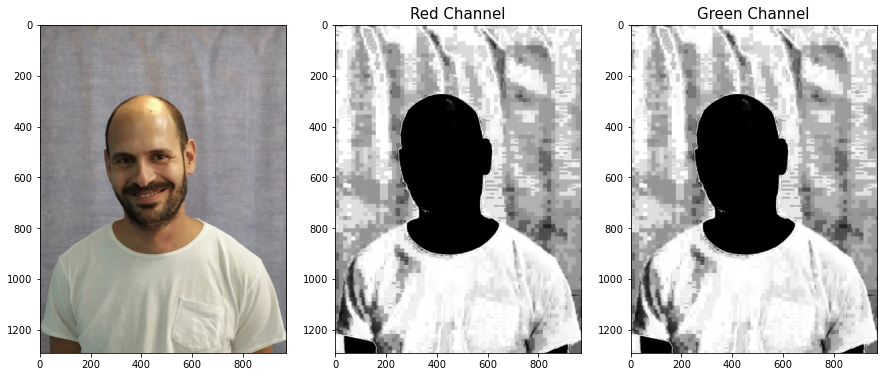

In [382]:
prob_R = gaussian(R,mean_patch_R,std_patch_R)
prob_G = gaussian(G,mean_patch_G,std_patch_G)
fig, ax = plt.subplots(1,3,figsize=(15,10))
ax[0].imshow(pic,cmap='gray')
ax[1].imshow(prob_R,cmap='gray')
ax[2].imshow(prob_R,cmap='gray')
ax[1].set_title('Grayscale',fontsize=15)
ax[1].set_title('Red Channel',fontsize=15)
ax[2].set_title('Green Channel',fontsize=15)
plt.show()

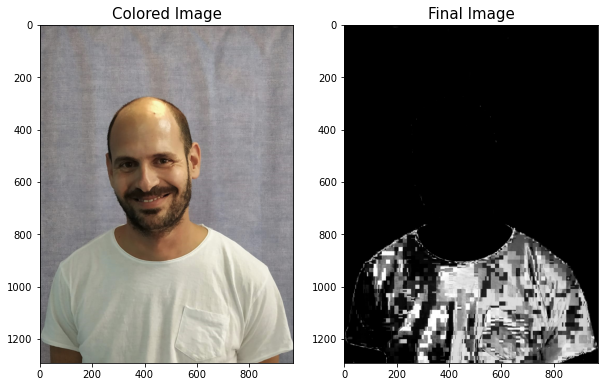

In [383]:
prob = prob_R * prob_G
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic)
ax[1].imshow(prob,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Final Image',fontsize=15)
plt.show()

In [460]:
from IPython.display import clear_output
from moviepy.editor import ImageSequenceClip

bw_pic = rgb2gray(pic)
th = 1
show(bw_pic)
plt.show()
frames = []
for i in range(100):
    
    new_pic = np.where(prob_R < th, bw_pic, 0)
    
    clear_output(wait = True)
    show(new_pic)
    plt.show()
    
    new_pic = np.expand_dims(new_pic, -1)
    frames.append(new_pic)
    
    th *= 0.1

# clip = ImageSequenceClip(list(frames), fps=20)
# clip.write_gif('test.gif', fps=20)

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>